Importamos librerias:

In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [42]:
#cargamos el csv
df_hosp = pd.read_csv("dataset/hospitalizaciones_train.csv")

In [43]:
df_hosp.head(1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8


Comenzamos a analizar:  

**Available Extra Rooms in Hospital:** Habitaciones adicionales disponibles en el hospital. Una habitación no es igual a un paciente, pueden ser individuales o compartidas.  

**Department:** Área de atención a la que ingresa el paciente.  

**Ward_Facility_Code:** Código de la habitación del paciente.  

**doctor_name:** Nombre de el/la doctor/a a cargo del paciente.  

**staff_available:** Cantidad de personal disponible al momento del ingreso del paciente.  

**patientid:** Identificador del paciente.  

**Age:** Edad del paciente.  

**gender:** Género del paciente.  

**Type of Admission:** Tipo de ingreso registrado según la situación de ingreso del paciente.  

**Severity of Illness:** Gravedad de la enfermedad/condición/estado del paciente al momento del ingreso.  

**health_conditions:** Condiciones de salud del paciente.  

**Visitors with Patient:** Cantidad de visitantes registrados para el paciente.  

**Insurance:** Indica si la persona posee o no seguro de salud.  

**Admission_Deposit:** Pago realizado a nombre del paciente, con el fin de cubrir los costos iniciales de internación.  

**Stay (in days):** Días registrados de estancia hospitalaria.   

#### EDA 

In [3]:
#miramos nulos
df_hosp.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

In [10]:
#miramos duplicados
masc = (df_hosp.duplicated() == True)

df_hosp[masc]


,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)


In [11]:
#vemos el tipo de cada columna
df_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [44]:
#pasamos la columna de dias a mayor a 8 dias =1 o ,menor a 8 dias = 0 
df_hosp["pred"] = df_hosp["Stay (in days)"].apply(lambda x: 1 if x > 8 else 0)

In [45]:
#dropeamos la columna "Stay (in days)" ya que es redundante.
df_hosp = df_hosp.drop(["Stay (in days)"],axis=1)

EDA VARIABLES CATEGÓRICAS

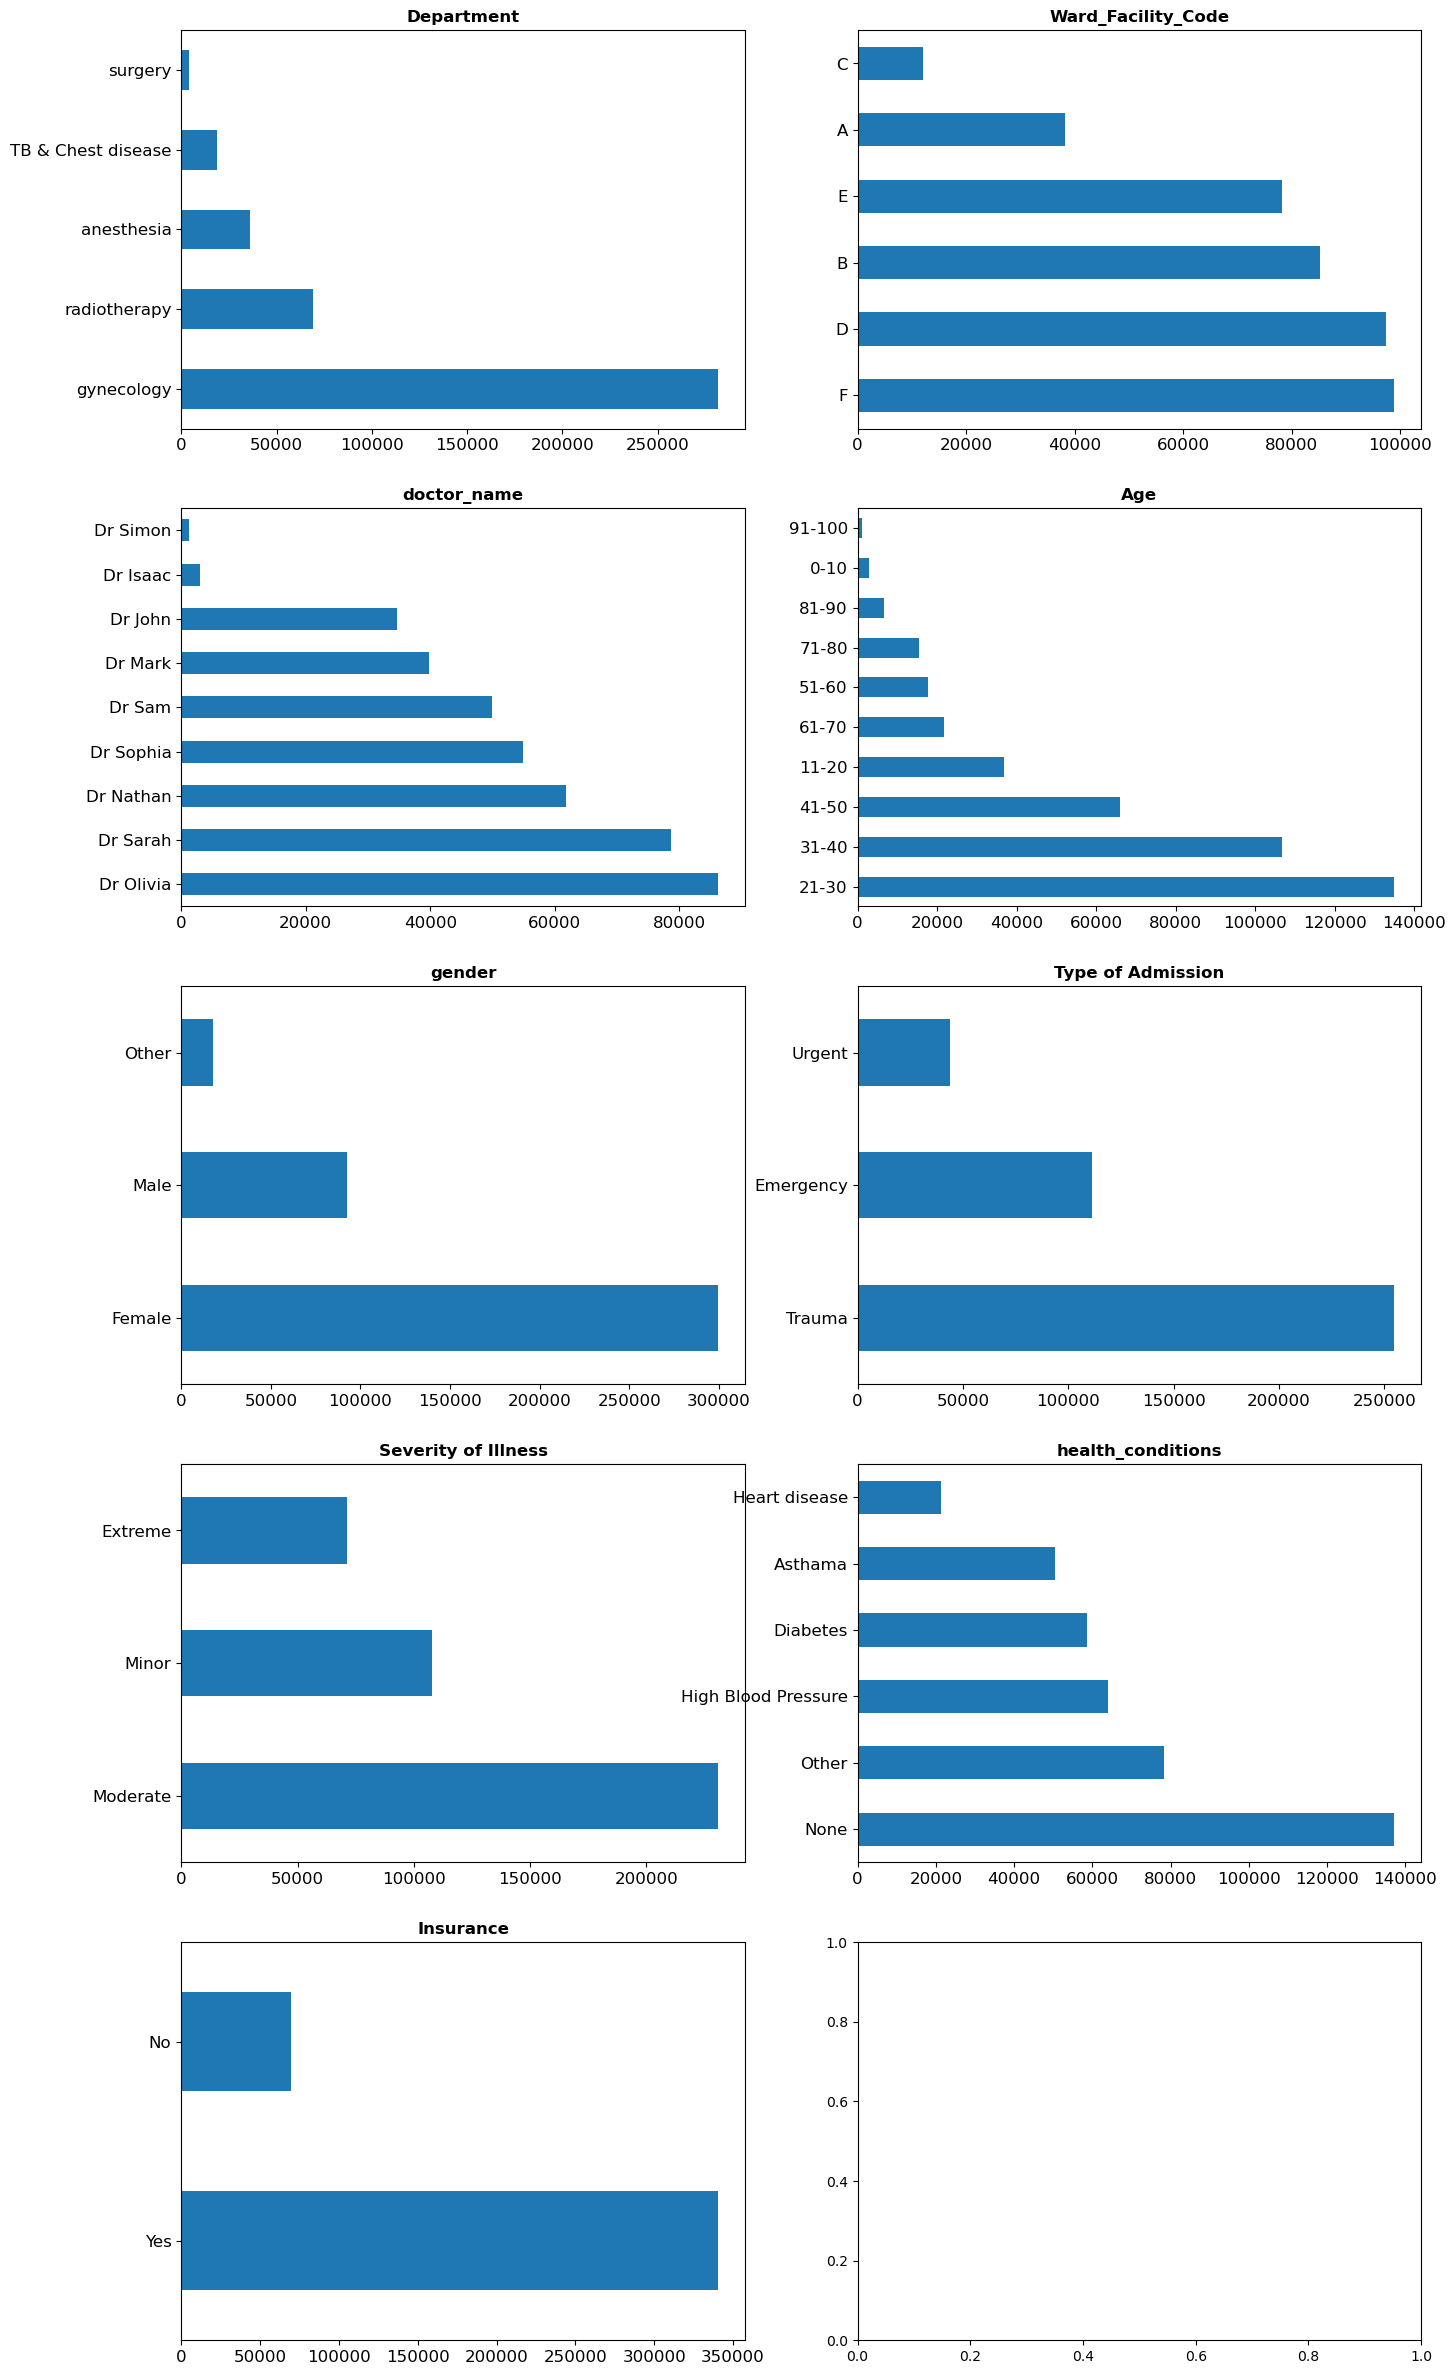

In [28]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        
        
graficos_eda_categoricos(df_hosp.select_dtypes('O'))

Conclusiones:

* Health_conditions ---> la categoria con mayor numero es "None", damos por entendido que esto no se refiere a datos nulos, sino a pacientes que no tienen una enfermedad previa  


EDA VARIABLES NUMÉRICAS

In [29]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)


estadisticos_cont(df_hosp.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,410000.0,3.639376,3.000000,2.701702,0.000000,2.000000,3.000000,4.00000,24.00000
staff_available,410000.0,5.020946,5.000000,3.158018,0.000000,2.000000,5.000000,8.00000,10.00000
patientid,410000.0,63095.940020,57736.000000,41686.175937,-3146.000000,25405.000000,57736.000000,103278.25000,134400.00000
Visitors with Patient,410000.0,3.552520,3.000000,2.247459,0.000000,2.000000,3.000000,4.00000,32.00000
Admission_Deposit,410000.0,4723.419239,4627.488745,1047.420292,1654.005148,4072.638351,4627.488745,5092.34943,10104.72639
pred,410000.0,0.622966,1.000000,0.484644,0.000000,0.000000,1.000000,1.00000,1.00000


Conclusiones:  

* No se encontro ninguna columna con solo 1 valor.  
* Se va a eliminar "patientid" por ser un valor ID que puede ocacionar problemas en nuestro modelo

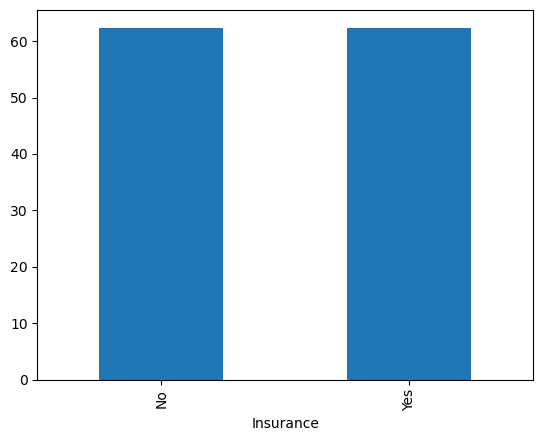

In [32]:
# Analisis por Insurance
temp = df_hosp.groupby('Insurance').pred.mean().sort_values(ascending = False) * 100
temp.plot.bar();

In [33]:
df_hosp.columns

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit', 'pred'],
      dtype='object')

Control de correlacion de las columnas con respecto a "pred"  

Para calcular la correlación entre datos numéricos y categóricos en Python, puedes usar la función pandas.crosstab() junto con la función scipy.stats.chi2_contingency(). Primero, crea una tabla de contingencia usando la función pandas.crosstab() y luego calcula la correlación entre las variables utilizando scipy.stats.chi2_contingency()

La función stats.chi2_contingency() devuelve una tupla de cuatro valores. Los dos primeros valores son el valor del estadístico chi-cuadrado y el p-valor correspondiente. El tercer valor es el número de grados de libertad asociados con el estadístico chi-cuadrado. El cuarto valor es una matriz de contingencia que contiene los valores observados en la tabla de contingencia.  

En mi caso usare P para ver la relacion entre columnas

In [1]:
#traemos la libreria scipy
from scipy import stats

In [9]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["Available Extra Rooms in Hospital"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

0.0


In [10]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["Department"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

0.0


In [11]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["Ward_Facility_Code"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

0.0


In [12]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["doctor_name"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

0.0


In [13]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["staff_available"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

0.027185032657605395


In [14]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["patientid"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

0.2915705642154938


In [15]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["Age"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

0.0


In [16]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["gender"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

0.0


In [17]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["Type of Admission"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

1.6947748596830627e-21


In [18]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["Severity of Illness"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

2.8750137241379228e-130


In [19]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["health_conditions"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

5.658483183151773e-09


In [20]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["Visitors with Patient"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

0.0


In [21]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["Insurance"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

0.4988221951889673


In [22]:
# Crea una tabla de contingencia
cor= pd.crosstab(df_hosp["pred"], df_hosp["Admission_Deposit"])
# Calcula la correlación entre las variables
chi2, p, dof, expected = stats.chi2_contingency(cor)
print(p)

0.49327701140734725


#### Conclusion:  
Luego de analizar la correlacion llegando a la conclusion de que si p es menor a 0.05 tiene una correlacion valiosa y si es mas alto de 0.5 no tienen una correlacion muy buena   
- Se van a eliminar las siguientes columnas al no tener una buena correlacion con nuestra columna pred:    
  - patientid  
  - Insurance  
- Observacion:
  - Admission_Deposit (despues de testearlo con y sin esta columna se llego a la conclusion que no se va a eliminar ya que mejora al modelo)
 


In [48]:
#creamos nuestro df con el que vamos a trabajar la parte de ML
df_ml = df_hosp.drop(["patientid","Insurance"], axis=1)

##### Normalizacion de datos

`LabelEncoder`:  
 Se utiliza para codificar variables categóricas como variables numéricas de forma que cada categoría se asigna a un número entero diferente.


In [49]:
#aplicamos labelencoder a las columnas Age y Severity of Illness porque despues del testeo con dummi, da mejor rendimiento de esta manera
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_ml['Age'] = le.fit_transform(df_ml['Age'])
df_ml['Severity of Illness'] = le.fit_transform(df_ml['Severity of Illness'])

`OneHotEncoder`:  
 Por otro lado, se utiliza para codificar variables categóricas como variables binarias

In [50]:
#Importamos OneHot
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto', handle_unknown='ignore')
#pasamos las columnas que queremos transformar
encoded_df= encoder.fit_transform(df_ml[["Department","Ward_Facility_Code","doctor_name","gender","health_conditions","Type of Admission"]]).toarray()

#lo convertimos en un df
encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names())

c:\Users\maxi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
#Creamos un nuevo df sin las columnas en las que aplicamos OneHot
df_con = df_ml.drop(["Department","Ward_Facility_Code","doctor_name","gender","health_conditions","Type of Admission"], axis=1)

In [52]:
#Concatenamos este nuevo df con las columnas transformadas anteriormente
df_con = pd.concat([df_con,encoded_df], axis=1)

In [53]:
#creamos nuestras variables y, x
X = df_con.drop(columns="pred")
y = df_con["pred"]

In [54]:
#separamos nuestros datos en entrenamiento y test
#despues de varios testeos se llego a la conclusion que en un random_state de 32 muestra su mejor performance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=32)


#### PIPELINE  
Creamos nuestros pipelines compararemos la performance de los modelos y buscaremos identificar el mejor de ellos. Una vez obtenido, lo guardamos en un archivo.  
Observacion: no vamos a utilizar svm ya que su rendimiento no es optimo en nuestro computador.

In [55]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [22]:
# Creamos el primer pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

# Creamos el segundo pipeline

pipe_dt = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(criterion="entropy",max_depth=19, random_state=42))])

In [23]:
# Los guardamos en una lista

pipelines = [pipe_lr, pipe_dt]

In [24]:
# Hacemos un diccionario para fines organizativos

pipe_dict = {0: 'Regresión Logística', 1: 'Árbol de decisión'}

In [ ]:
# Entrenamos

for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [76]:
# Evaluamos

for idx, val in enumerate(pipelines):
	print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Regresión Logística pipeline accuracy en test: 0.621
Árbol de decisión pipeline accuracy en test: 0.649


In [77]:
# Identificamos el mejor modelo para el set de testeo

best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx
print('Modelo con el mejor accuracy: %s' % pipe_dict[best_clf])

Modelo con el mejor accuracy: Árbol de decisión


In [78]:
# Guardamos el pipeline en un archivo

import joblib #pickle es alternativa

joblib.dump(best_pipe, 'Mejor_pipeline.pkl', compress=1)
print('Pipeline de %s guardado a archivo' % pipe_dict[best_clf])

Pipeline de Árbol de decisión guardado a archivo


## ENTRENAMIENTO  

### Se van a probar `DecisionTreeClassifier` y `RandomForest`  

### `DecisionTreeClassifier` 

Voy a utilizar el Árbol de decisión para el modelo ya que fue la recomendacion del pipeline luego de la evaluacion y es con el que mas familiarizado estoy.

In [56]:
#importamos y entrenamos el arbol de decicion
from sklearn.tree import DecisionTreeClassifier

#se usa una profundidad de 19 luego de provar varias y llegar a la conclusion que es la que mejor resultados arroja.
#se usa entropy porque lanzo un mejor recall
arbol = DecisionTreeClassifier(criterion="entropy",max_depth=19, random_state=42)
#entrenamiento
arbol.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, random_state=42)

In [57]:
#realizamos la prediccion
y_pred = arbol.predict(X_test)

In [58]:
#usamos confusion matrix para visualizar el desempeño de un algoritmo
#podemos observar que el modelo trabaja mucho mejor encontrando los 1 verdaderos, que los 0. 
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test,y_pred)
cm

array([[26231, 12314],
       [10690, 53265]], dtype=int64)

c:\Users\maxi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


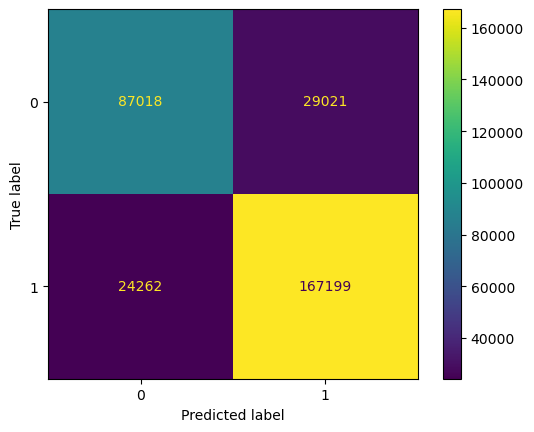

In [59]:
# Importar la función plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# Graficar la matriz de confusión y mostrar el accuracy y el recall
plot_confusion_matrix(arbol, X_train, y_train)
plt.show()

In [60]:
#verificamos las metricas de nuestro modelo
from sklearn import metrics

print("accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1score:", metrics.f1_score(y_test,y_pred))

accuracy:  0.775570731707317
Recall:  0.8328512235165351
F1score: 0.8224095604242901


Ahora utilizamos K-fold para realizar la validación cruzada y evaluar que tan bien funciona el modelo que desarrollamos:

In [26]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(10) # Acá indicamos cuantos fold queremos. En nuestro caso elegimos 10.

In [27]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(arbol, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados 

[0.77036585 0.76873171 0.77       0.77656098 0.77502439 0.77656098
 0.77736585 0.77819512 0.77502439 0.77087805]


0.7738707317073171

#### Conclusion:  
- El modelo arroja un accuracy de aproximadamente 70% con un recall del 88% y un F1 score del 78%.
- Actualizacion: dejando la columna "Admission_Deposit" y cambiando la columna "Age" y 'Severity of Illness' con Labelencoder el acc aumento un 6% aproximadamente, bajando un 6% el recall y aumentando el F1 score en un 3%, pero quedando mas balanceado.  
Dejando como resultado : `accuracy:77%, Recall: 83% y F1score: 82%`

#### Importancia de las variables

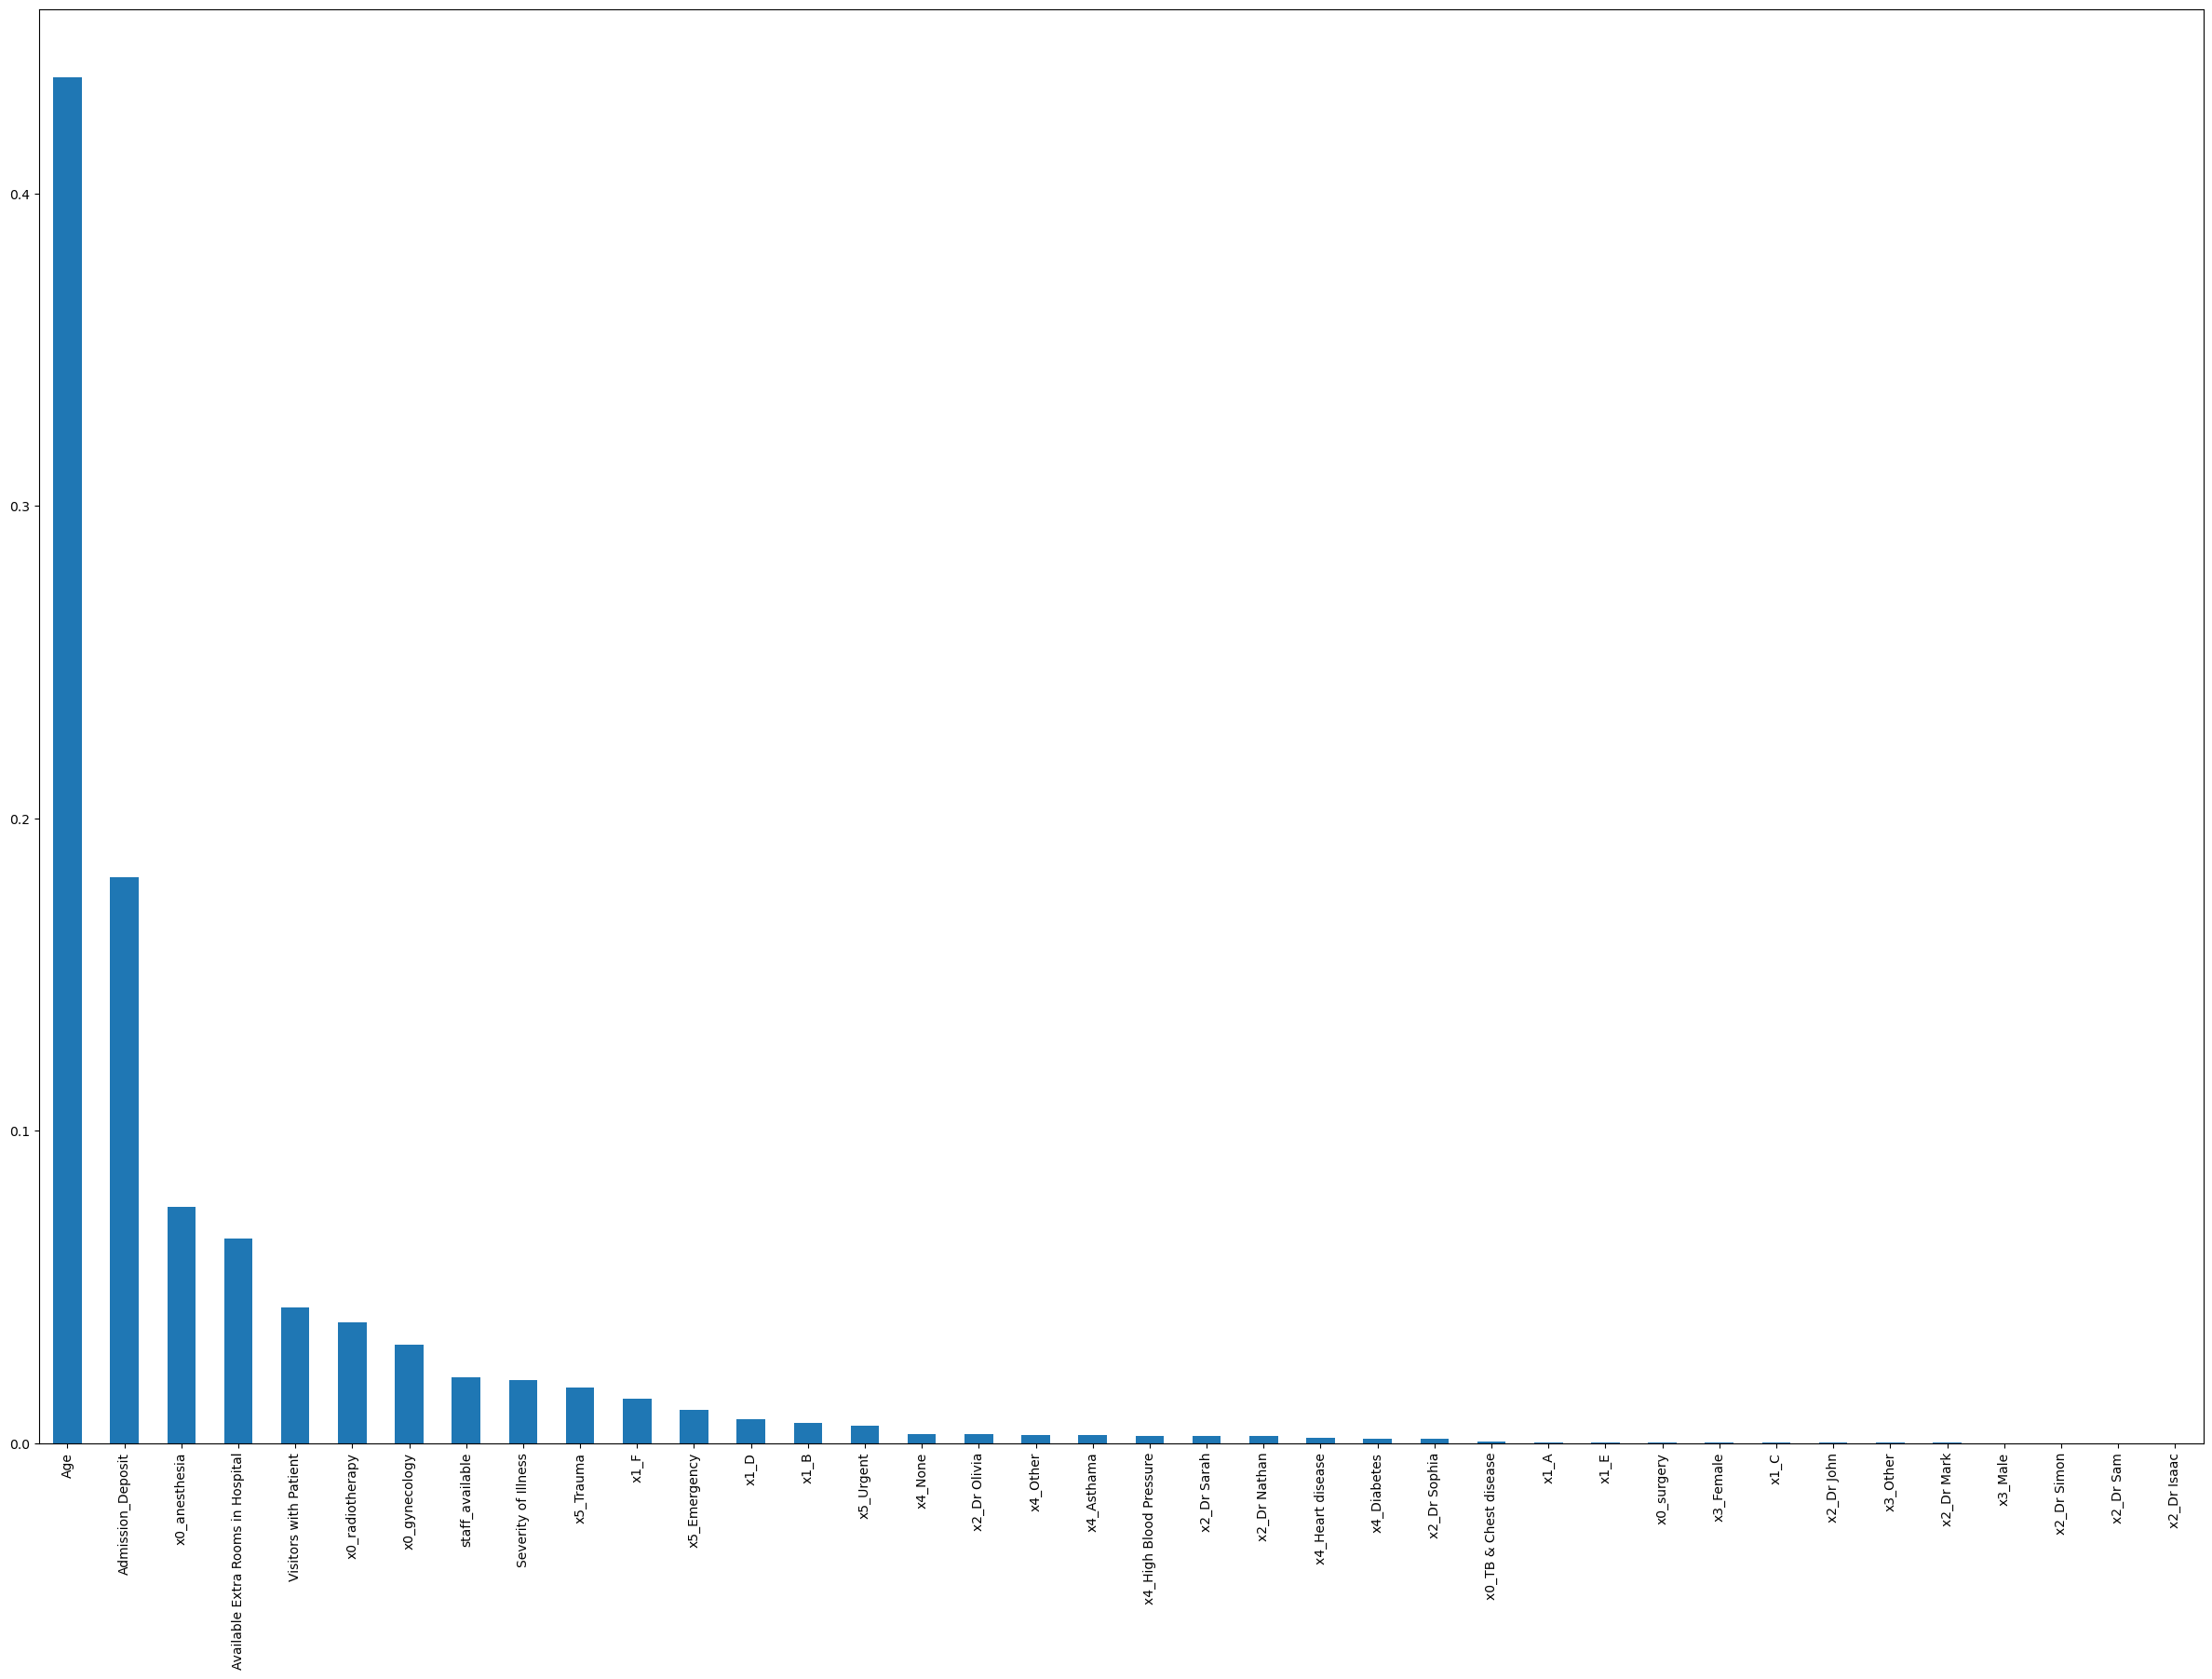

In [73]:
pd.Series(arbol.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

### `RandomForest` 

Utilizamos randomForest para ver su rendimiento.

In [30]:
# Importar la clase RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Crear un objeto RandomForestClassifier
forest = RandomForestClassifier()

# Entrenar el modelo con los datos de entrenamiento
forest.fit(X_train, y_train)

# Hacer predicciones en datos nuevos
predictions = forest.predict(X_test)

#usamos confusion matrix para visualizar el desempeño de un algoritmo
#podemos observar que el modelo trabaja mucho mejor encontrando los 1 verdaderos, que los 0. 
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test,predictions)
cm


#verificamos las metricas de nuestro modelo
from sklearn import metrics

print("accuracy: ", metrics.accuracy_score(y_test,predictions))
print("Recall: ", metrics.recall_score(y_test,predictions))
print("F1score:", metrics.f1_score(y_test,predictions))

accuracy:  0.7611121951219513
Recall:  0.8201078883590024
F1score: 0.8107523225078447


#### Conclusion:  
En la puesta en practica del modelo Forest dio un sobreentrenamiento de los datos.

Una vez terminado la primera etapa pasamos a la siguiente donde vamos a usar el csv de "test" para predecir y crear la culumna "pred". Antes de realizar esto tenemos que normalizar los datos borrando la mismas columnas y poniendolo en el mismo formato con el que trabajamos el arbol

In [61]:
df_test = pd.read_csv("dataset\hospitalizaciones_test.csv")

In [62]:
#dropeamos las columnas que no usaremos
df_test = df_test.drop(["patientid","Insurance"], axis=1)

In [63]:
#normalizamos los datos con Label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_test['Age'] = le.fit_transform(df_test['Age'])
df_test['Severity of Illness'] = le.fit_transform(df_test['Severity of Illness'])

In [64]:
#normalizamos los datos con Onehot
#Importamos OneHot
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto', handle_unknown='ignore')
#pasamos las columnas que queremos transformar
encoded_df= encoder.fit_transform(df_test[["Department","Ward_Facility_Code","doctor_name","gender","health_conditions","Type of Admission"]]).toarray()

#lo convertimos en un df
encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names())

c:\Users\maxi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
#Creamos un nuevo df sin las columnas en las que aplicamos OneHot
df_con = df_test.drop(["Department","Ward_Facility_Code","doctor_name","gender","health_conditions","Type of Admission"], axis=1)

In [66]:
#Concatenamos este nuevo df con las columnas transformadas anteriormente
df_con = pd.concat([df_con,encoded_df], axis=1)

In [67]:
df_con

,Available Extra Rooms in Hospital,staff_available,Age,Severity of Illness,Visitors with Patient,Admission_Deposit,x0_TB & Chest disease,x0_anesthesia,x0_gynecology,x0_radiotherapy,...,x3_Other,x4_Asthama,x4_Diabetes,x4_Heart disease,x4_High Blood Pressure,x4_None,x4_Other,x5_Emergency,x5_Trauma,x5_Urgent
0,3,10,2,2,2,4749.640225,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,4,5,2,2,4122.261324,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,7,5,2,3,5459.067882,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2,1,2,2,2,3987.033318,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2,7,5,0,2,4770.789695,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,4,2,1,1,3,4105.795901,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
89996,13,8,3,2,2,4631.550257,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
89997,2,3,1,2,2,5456.930075,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
89998,2,1,6,0,2,4694.127772,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
#realizamos la prediccion
test_pred = arbol.predict(df_con)

In [69]:
#transformamos el array en df y le cambiamos el nombre a la columna
df_pred = pd.DataFrame(test_pred, columns=["pred"])


In [92]:
df_pred

,pred
0,0
1,1
2,1
3,1
4,1
...,...
89995,0
89996,1
89997,0
89998,1


In [70]:
#lo hacemos al df un csv y le sacamos el index
df_pred.to_csv("MaxiDS.csv", index=False)